In [1]:
########### Analyzing Jaz' data -- DPT (Double positive T cells)

## import packages

import os
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm


In [2]:
# show the current directory
os.getcwd()

'/Users/uqssoon/Documents/Projects/Jaz-project/notebooks'

In [3]:
# print software versions
sc.logging.print_header()

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/distances.

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [4]:
ddl.logging.print_header()

dandelion==0.3.2 pandas==2.0.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


Pre-processing has been done by Kelvin in his notebooks

These are steps for reading in the raw data - don't run this!

In [ ]:
#### Pre-processing has been done by Kelvin in his notebooks

#### These are steps for reading in the raw data - don't run this!

#RAWFOLDER = "/QRISdata/Q5688/GONZ-0001_run2/count"
# also specify the names of the folders (sans _GEX for simplicity)
#samples = [
    "CD4_L01",
    "CD4_P01",
    "CD4_WY",
    "CD8_L01",
    "CD8_P01",
    "CD8_WY",
    "DP_L01",
    "DP_P01",
    "DP_WY",
    "V_CD4",
    "V_CD8",
    "V_DP",
#]

# each is an individual run where it is donor_celltype, so 4 donors, 3 celltypes per donor

### use a for-loop to read in files, add them to a list and concatenate them

#from pathlib import Path

#adata_list = []  # create an empty list first
#for sample in tqdm(samples):
    # we will use Path to construct the path to the 10x file
    # you can also just use
    # file_path = "/QRISdata/Q5688/GONZ-0001/count/" + sample + "_GEX/outs/filtered_feature_bc_matrix.h5"
    # exactly the same
    #file_path = (
    #    Path(RAWFOLDER) / (sample + "_GEX") / "outs" / "filtered_feature_bc_matrix.h5"
    #)
    #tmp = sc.read_10x_h5(file_path)
    #tmp.var_names_make_unique()
    # update the metadata with the sample folder info
    #tmp.obs["sample"] = sample
    #if sample.split("_")[0] == "V":                  ### splitting string by "_" and selecting the first string, eg V_CD4, it will write in "sort.type" as CD4
    #    tmp.obs["sort_type"] = sample.split("_")[
    #        1
    #    ]  # split based on _ and select the second
    #    tmp.obs["donor"] = sample.split("_")[0]  # split based on _ and select the first     ### splitting string by "_" and selecting the zeroth string, eg V_CD4, it will write in "donor" as V
    #else:                  ## for every other sample that where sample.split("_")[0] does not equal V, eg CD4_L01
    #    tmp.obs["sort_type"] = sample.split("_")[                   #in this case, take zeroth string and add to sort type, so here, CD4 will be added
    #        0
    #    ]  # split based on _ and select the first
    #    tmp.obs["donor"] = sample.split("_")[                       #in this case, take first string and add to donor, so here, L01 will be added
    #        1
    #    ]  # split based on _ and select the second
    #### adjust the cell barcode name so that there won't be duplicates later
    #tmp.obs_names = [sample + "_" + n for n in tmp.obs_names]
    # generate some QC metrics
   ##### tmp.var["mt"] = tmp.var_names.str.startswith(
        "MT-"
    #)  # annotate the group of mitochondrial genes as 'mt'
    #sc.pp.calculate_qc_metrics(
    #    tmp, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
    #)
    ###### dandelion has a quick recipe function to quickly mark doublets and bad quality cells
    #ddl.pp.external.recipe_scanpy_qc(
    #    tmp, max_genes=10000, mito_cutoff=None, mito_startswith="MT-"
    #)
    ##### ok now append the list to include each file
    #adata_list.append(tmp)



#########concatenate
# adata = adata_list[0].concatenate(adata_list[1:], index_unique=None)               #you are selecting the zeroth adata, and then concatenating it with with the first and so on until the end
# keep only relevant columns in part of the object
#adata.var = adata.var[["gene_ids", "feature_types", "genome", "mt"]]      #feature types is from features.rsv - usually for multimodal data
#adata

In [5]:
# make sure you have mount up the data directory by using the "connect to server"
from pathlib import Path
out_path = Path("/Volumes/KTDDL23-Q5935/scDPT/") / "kelvin" / "h5ad"
# out_path = Path("/Volumes/KTDDL23-Q5935/scDPT/kelvin/h5ad")

In [34]:
#### read in data

# raw data before ANY filtering
# "raw_adata_v2.h5ad"


# data before TCR was added
adata = sc.read_h5ad(out_path/"adata_processed_v2.h5ad")
###  with BBKNN
"adata_processed_bbknn_v2.h5ad"

'adata_processed_bbknn_v2.h5ad'

In [35]:
adata

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'leiden', 'celltypist_majority_voting'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypist_majority_voting_colors', 'donor_colors', 'filter_rna_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'sample_colors', 'sort_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [36]:
# with tcr
#adatax = sc.read_h5ad(out_path/"adata_processed_v2_tcr.h5ad")


In [37]:
### looking at our metadata
adata.obs   #- observational level
adata.var   # variable level

,gene_ids,feature_types,genome,mt,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
FAM41C,ENSG00000230368,Gene Expression,GRCh38,False,164,True,0.017313,2.514723,0.627050,1.054121e-12,0.098093
TNFRSF4,ENSG00000186827,Gene Expression,GRCh38,False,2543,True,0.231964,2.478021,0.515548,-1.228507e-11,0.373420
SCNN1D,ENSG00000162572,Gene Expression,GRCh38,False,144,True,0.014485,2.530534,0.675083,-3.276235e-12,0.089961
ACAP3,ENSG00000131584,Gene Expression,GRCh38,False,963,True,0.093425,2.564584,0.778529,3.201405e-12,0.230970
MMP23B,ENSG00000189409,Gene Expression,GRCh38,False,286,True,0.026035,2.479864,0.521146,-7.268231e-12,0.121321
...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,20508,True,1.325184,2.533633,0.632899,2.847229e-11,0.788600
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,22846,True,1.420044,2.520005,0.741754,-1.192042e-11,0.868553
MT-CYB,ENSG00000198727,Gene Expression,GRCh38,True,24062,True,1.582738,2.634734,1.288529,-2.307202e-11,0.831010
MAFIP,ENSG00000274847,Gene Expression,GRCh38,False,289,True,0.034021,2.576047,0.813357,-1.801624e-11,0.136857


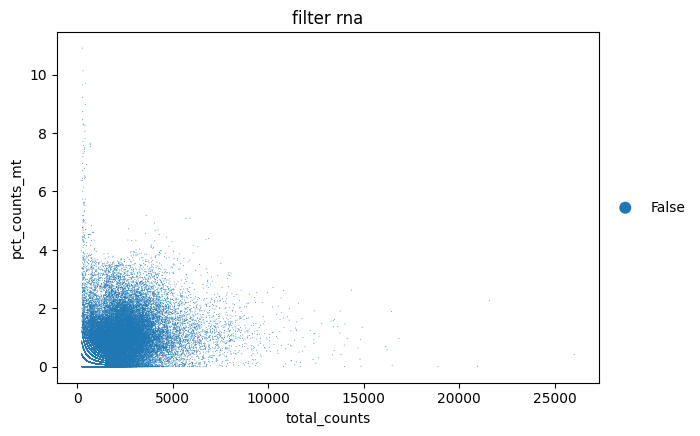

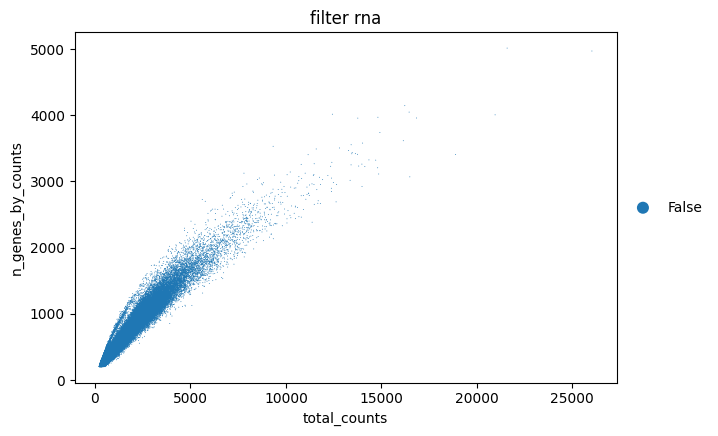

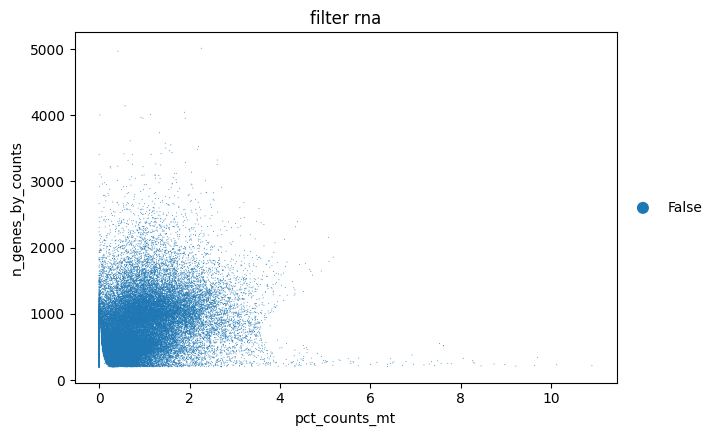

In [38]:
########## Visualise QC metrics

# plot some QC metrics - this "filter_rna" column is through the ddl.pp.external.recipe_scanpy_qc function - in this context, we specified that cells that pass filtering are those with max_genes< 10000, and with no mito cutoff at this stage. 
# # use a gmm model to decide which cells pass or not - whatever this does... 
# those that pass, will be "filter_rna" = 'False'

# in this data, because it has been pre-processed - everything is "False"
sc.pl.scatter(adata, x = "total_counts", y = "pct_counts_mt", color = "filter_rna")
sc.pl.scatter(adata, x = "total_counts", y = "n_genes_by_counts", color = "filter_rna")
sc.pl.scatter(adata, x="pct_counts_mt", y = "n_genes_by_counts", color = "filter_rna")

Tabulate number of cells per sample... (Note this is after QC)

In [39]:
# tabulate # of the cells that can be analysed (false is good here)
pd.crosstab(adata.obs["sample"], adata.obs["filter_rna"])
# https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
# https://pbpython.com/pandas-crosstab.html


filter_rna,False
sample,
CD4_L01,9950
CD4_P01,8115
CD4_WY,11674
CD8_L01,1328
CD8_P01,6659
CD8_WY,9440
DP_L01,1765
DP_P01,5074
DP_WY,1967


In [41]:
## redo this as percentage
# Basically you just have the function that does row/row.sum(), and you use apply with axis=1 to apply it by row.
pd.crosstab(adata.obs["sample"], adata.obs["filter_rna"]).apply(
    lambda row: row/row.sum() * 100, axis = 1 
)


######E Note: because this is AFTER pre-processing, obs it will be 100%!

# results from the raw: 
#filter_rna	False	True
#sample		
#CD4_L01	9950	1437
#CD4_P01	8115	3890
#CD4_WY	11674	439
#CD8_L01	1328	8136
#CD8_P01	6659	2123
#CD8_WY	9440	1923
#DP_L01	1765	4900
#DP_P01	5074	3353
#DP_WY	1967	4611
#V_CD4	3605	7970
#V_CD8	6277	3513
#V_DP	5710	2913

filter_rna,False
sample,
CD4_L01,100.0
CD4_P01,100.0
CD4_WY,100.0
CD8_L01,100.0
CD8_P01,100.0
CD8_WY,100.0
DP_L01,100.0
DP_P01,100.0
DP_WY,100.0


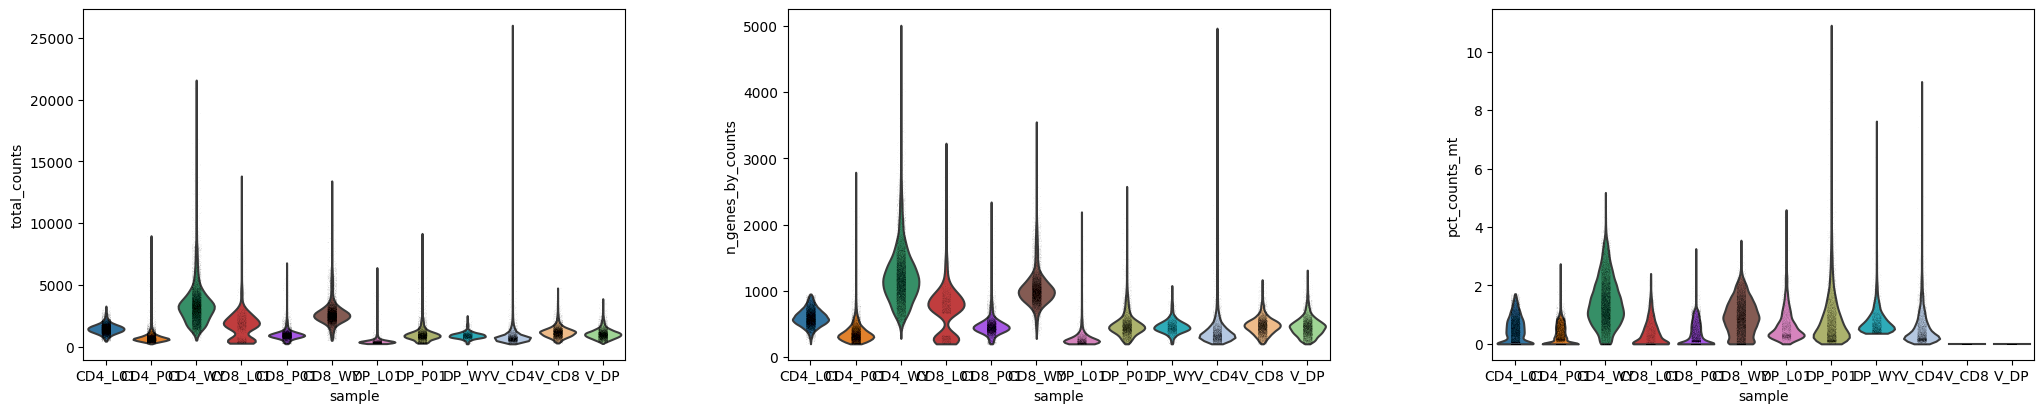

In [42]:
## Should try to plot vln plots for QC metrics too
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='sample', multi_panel = True)


## there are several samples that jump out:
# CD4_WY has higher counts but also high mito in general
# CD8_L01 has a lot of cells that are low read counts
# CD8_WY has super high read cpunts aagain
# DP_L01 has a lot of low read cells

## In general, the DPs seem to be pretty shitty? 

Continue processing with good cells only

In [43]:
# let's continue   - NOTE: nothing will change here, because this is pre-processed
adata = adata[adata.obs["filter_rna"] == "False"].copy()


#################    THINGS TO ASK KELVIN: WHY NO MT CUTOFF?  - why don't get it down to <5??


# remove uninformative genes for now
sc.pp.filter_genes(adata, min_cells=3)

In [59]:
adata #(initially, there were like 36601 genes) 

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'leiden', 'celltypist_majority_voting'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypist_majority_voting_colors', 'donor_colors', 'filter_rna_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'sample_colors', 'sort_type_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [60]:
# then the rest as per scanpy's tutorial

# Total-count normalize (library-size correct) the data matrix 𝐗 to 10,000 reads per cell, so that counts become comparable among cells.
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data:
sc.pp.log1p(adata)


/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts


In [61]:
# Identify highly-variable genes.
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

ValueError: Bin edges must be unique: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [47]:
# see genes
adata.var

,gene_ids,feature_types,genome,mt,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
FAM41C,ENSG00000230368,Gene Expression,GRCh38,False,164,True,0.017313,2.514723,0.627050,1.054121e-12,0.098093
TNFRSF4,ENSG00000186827,Gene Expression,GRCh38,False,2543,True,0.231964,2.478021,0.515548,-1.228507e-11,0.373420
SCNN1D,ENSG00000162572,Gene Expression,GRCh38,False,144,True,0.014485,2.530534,0.675083,-3.276235e-12,0.089961
ACAP3,ENSG00000131584,Gene Expression,GRCh38,False,963,True,0.093425,2.564584,0.778529,3.201405e-12,0.230970
MMP23B,ENSG00000189409,Gene Expression,GRCh38,False,286,True,0.026035,2.479864,0.521146,-7.268231e-12,0.121321
...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,25031,True,1.325184,2.533633,0.632899,2.847229e-11,0.788600
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,19898,True,1.420044,2.520005,0.741754,-1.192042e-11,0.868553
MT-CYB,ENSG00000198727,Gene Expression,GRCh38,True,24151,True,1.582738,2.634734,1.288529,-2.307202e-11,0.831010
MAFIP,ENSG00000274847,Gene Expression,GRCh38,False,292,True,0.034021,2.576047,0.813357,-1.801624e-11,0.136857


In [49]:
### to get structure of dataframe
adata.var.info()
adata.obs.info()

### to get the number of HV genes... because the column "highly_variable" is a boolean vector - ie it gives True (1) or False (0), you can use sum function to know... 
print(adata.var.highly_variable.sum())   #####2285 HV genes.. 

<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, FAM41C to AL592183.1
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gene_ids          2285 non-null   object  
 1   feature_types     2285 non-null   category
 2   genome            2285 non-null   category
 3   mt                2285 non-null   bool    
 4   n_cells           2285 non-null   int64   
 5   highly_variable   2285 non-null   bool    
 6   means             2285 non-null   float64 
 7   dispersions       2285 non-null   float64 
 8   dispersions_norm  2285 non-null   float32 
 9   mean              2285 non-null   float64 
 10  std               2285 non-null   float64 
dtypes: bool(2), category(2), float32(1), float64(4), int64(1), object(1)
memory usage: 207.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 71564 entries, CD4_L01_AAACCTGAGAGCTATA-1 to V_DP_TTTGTCATCTTGTTTG-1
Data columns (total 15 columns):
 #   Column       

In [51]:
adata.uns['log1p'] 

{}

In [52]:
adata.uns['log1p'] ["base"]

KeyError: 'base'